#EDA-1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
df = pd.read_csv('/content/BIKE DETAILS.csv')

In [ ]:
# Question 1: What is the range of selling prices in the dataset?
selling_price_range = df['selling_price'].max() - df['selling_price'].min()
print("Q1. Range of Selling Prices:", selling_price_range)


Q1. Range of Selling Prices: 755000


In [ ]:
# Question 2: What is the median selling price for bikes in the dataset?
median_selling_price = df['selling_price'].median()
print("Q2. Median Selling Price:", median_selling_price)


Q2. Median Selling Price: 45000.0


In [ ]:
# Question 3: What is the most common seller type?
most_common_seller_type = df['seller_type'].mode()[0]
print("Q3. Most Common Seller Type:", most_common_seller_type)


Q3. Most Common Seller Type: Individual


In [ ]:
# Question 4: How many bikes have driven more than 50,000 kilometers?
bikes_above_50k_km = df[df['km_driven'] > 50000].shape[0]
print("Q4. Bikes Driven > 50000 km:", bikes_above_50k_km)

Q4. Bikes Driven > 50000 km: 170


In [ ]:
# Question 5: What is the average km_driven value for each ownership type?
avg_km_by_owner = df.groupby('owner')['km_driven'].mean()
print("Q5. Average KM Driven by Owner Type:\n", avg_km_by_owner)

Q5. Average KM Driven by Owner Type:
 owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [ ]:
# Question 6: What proportion of bikes are from the year 2015 or older?
proportion_2015_or_older = (df[df['year'] <= 2015].shape[0]) / df.shape[0]
print("Q6. Proportion of Bikes from 2015 or Older:", round(proportion_2015_or_older, 2))


Q6. Proportion of Bikes from 2015 or Older: 0.57


In [ ]:
# Question 7: What is the trend of missing values across the dataset?
missing_values = df.isnull().sum()
print("Q7. Missing Values:\n", missing_values)


Q7. Missing Values:
 name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


In [ ]:
# Question 8: What is the highest ex_showroom_price recorded, and for which bike?
highest_price_bike = df.loc[df['ex_showroom_price'].idxmax()][['name', 'ex_showroom_price']]
print("Q8. Highest Ex-Showroom Price and Bike:\n", highest_price_bike)


Q8. Highest Ex-Showroom Price and Bike:
 name                 Harley-Davidson Street Bob
ex_showroom_price                     1278000.0
Name: 134, dtype: object


In [ ]:
# Question 9: What is the total number of bikes listed by each seller type?
bikes_by_seller = df['seller_type'].value_counts()
print("Q9. Bikes Listed by Seller Type:\n", bikes_by_seller)


Q9. Bikes Listed by Seller Type:
 seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


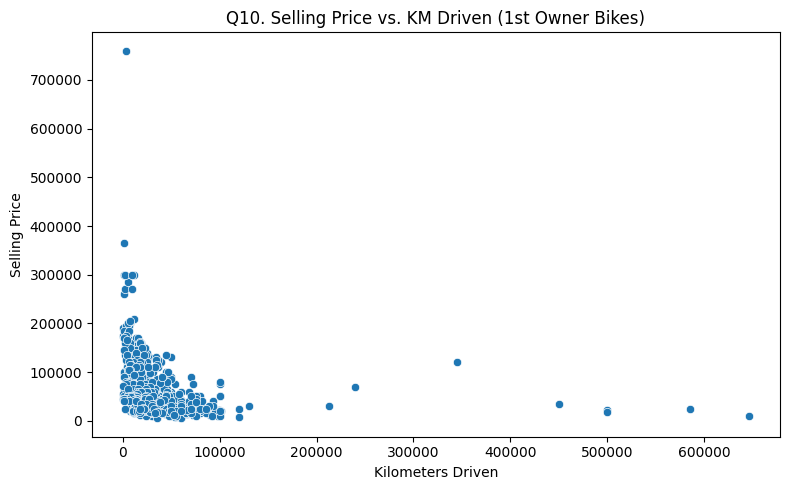

In [ ]:
# Question 10: What is the relationship between selling_price and km_driven for first-owner bikes?
first_owner_df = df[df['owner'].str.contains('1st owner', na=False)]
plt.figure(figsize=(8, 5))
sns.scatterplot(data=first_owner_df, x='km_driven', y='selling_price')
plt.title('Q10. Selling Price vs. KM Driven (1st Owner Bikes)')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.tight_layout()
plt.show()

In [ ]:
# Question 11: Identify and remove outliers in the km_driven column using the IQR method
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
km_outlier_condition = (df['km_driven'] >= (Q1 - 1.5 * IQR)) & (df['km_driven'] <= (Q3 + 1.5 * IQR))
df_no_outliers = df[km_outlier_condition]
print("Q11. Removed outliers based on km_driven using IQR method")


Q11. Removed outliers based on km_driven using IQR method


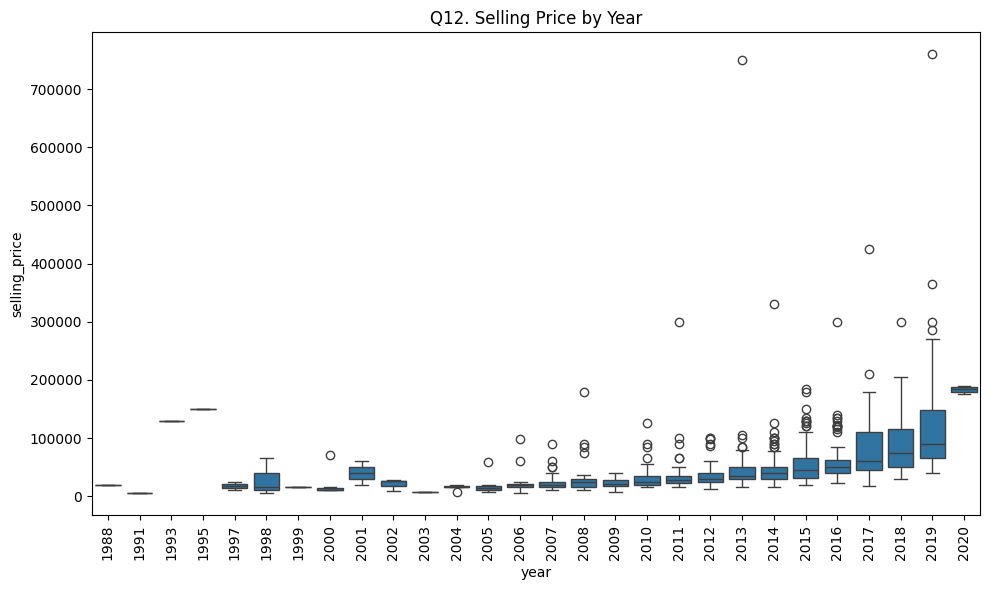

In [ ]:
# Question 12: Perform a bivariate analysis to visualize the relationship between year and selling_price
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='year', y='selling_price')
plt.xticks(rotation=90)
plt.title('Q12. Selling Price by Year')
plt.tight_layout()
plt.show()

In [ ]:
# Question 13: What is the average depreciation in selling price based on the bike's age?
current_year = datetime.datetime.now().year
df['age'] = current_year - df['year']
df['depreciation'] = df['ex_showroom_price'] - df['selling_price']
avg_depreciation_by_age = df.groupby('age')['depreciation'].mean()
print("Q13. Avg Depreciation by Age:\n", avg_depreciation_by_age)


Q13. Avg Depreciation by Age:
 age
5    -34260.000000
6      2954.562500
7     13023.194805
8     22306.082353
9     28328.190476
10    28013.275000
11    34505.606061
12    43086.886792
13    37317.648649
14    47102.666667
15    45658.928571
16    38227.785714
17    54732.428571
18    42399.000000
19    39664.500000
20    44852.000000
21    36852.000000
22             NaN
23             NaN
24    34852.000000
25             NaN
26             NaN
27             NaN
28             NaN
30             NaN
32             NaN
34             NaN
37             NaN
Name: depreciation, dtype: float64


In [ ]:
# Question 14: Which bike names are priced significantly above the average price for their manufacturing year?
yearly_avg = df.groupby('year')['selling_price'].mean().reset_index()
df = df.merge(yearly_avg, on='year', suffixes=('', '_year_avg'))
df['above_avg'] = df['selling_price'] > df['selling_price_year_avg'] + df['selling_price_year_avg'].std()
bikes_above_avg = df[df['above_avg']][['name', 'year', 'selling_price']]
print("Q14. Bikes Priced Above Year Avg:\n", bikes_above_avg.head())


Q14. Bikes Priced Above Year Avg:
                                     name  year  selling_price
0              Royal Enfield Classic 350  2019         175000
2    Royal Enfield Classic Gunmetal Grey  2018         150000
7   Royal Enfield Bullet 350 [2007-2011]  2008         180000
13                         Yamaha YZF R3  2019         365000
18   Royal Enfield Classic Gunmetal Grey  2018         150000


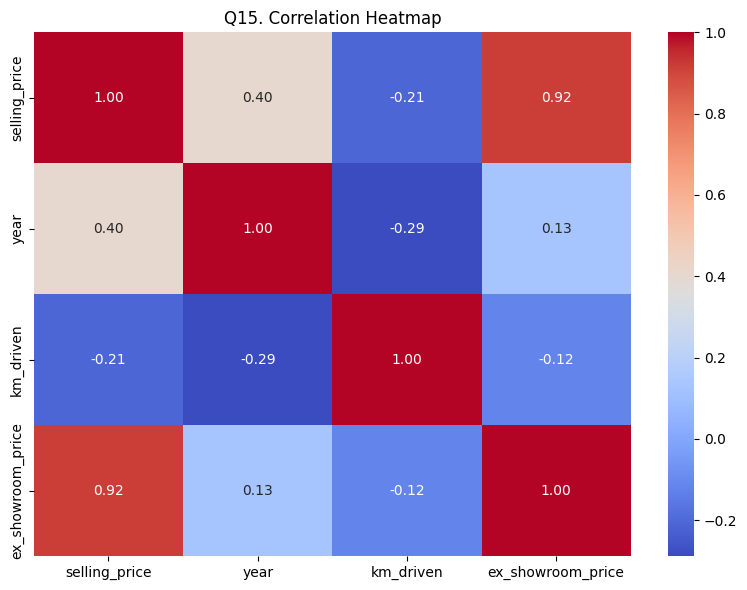

In [ ]:
# Question 15: Develop a correlation matrix for numeric columns and visualize it using a heatmap
numeric_df = df[['selling_price', 'year', 'km_driven', 'ex_showroom_price']]
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Q15. Correlation Heatmap')
plt.tight_layout()
plt.show()


#EDA 2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/Car Sale.csv')

In [ ]:
# Question 1: What is the average selling price of cars for each dealer, and how does it compare across different dealers
avg_price_by_dealer = df.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)
print("Q1. Average selling price by dealer:\n", avg_price_by_dealer)


Q1. Average selling price by dealer:
 Dealer_Name
U-Haul CO                                          28769.919006
Classic Chevy                                      28602.014446
Rabun Used Car Sales                               28527.536177
Iceberg Rentals                                    28522.958533
Enterprise Rent A Car                              28312.580800
Scrivener Performance Engineering                  28297.371589
Gartner Buick Hyundai Saab                         28247.621019
Saab-Belle Dodge                                   28190.139888
Capitol KIA                                        28189.703822
Race Car Help                                      28163.372706
Chrysler of Tri-Cities                             28123.091054
Star Enterprises Inc                               28113.055244
Suburban Ford                                      28112.206758
C & M Motors Inc                                   28111.755200
Tri-State Mack Inc                                 280

In [ ]:
# Question 2:  Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing
#trends?
variation_by_company = df.groupby('Company')['Price ($)'].std().sort_values(ascending=False)
print("Q2. Brand with highest price variation:\n", variation_by_company)

Q2. Brand with highest price variation:
 Company
Lincoln       19658.050211
Saab          19653.740089
Cadillac      19517.120220
Plymouth      19065.997338
Lexus         17852.923492
Buick         17142.232626
Mercury       16445.172195
Nissan        16214.264017
Saturn        15990.223671
Ford          15849.090227
Mercedes-B    15722.807459
Oldsmobile    15711.345857
Toyota        15367.131714
BMW           15065.578723
Pontiac       14348.963592
Infiniti      13696.332844
Chevrolet     13311.063223
Volvo         12933.790185
Subaru        12920.771620
Audi          12904.243867
Volkswagen    12527.124011
Mitsubishi    11671.343035
Chrysler      11583.286811
Dodge         11187.592085
Honda         11148.629062
Jaguar        10222.531533
Jeep           9459.834418
Acura          8183.046414
Porsche        5261.839206
Hyundai        3485.982649
Name: Price ($), dtype: float64


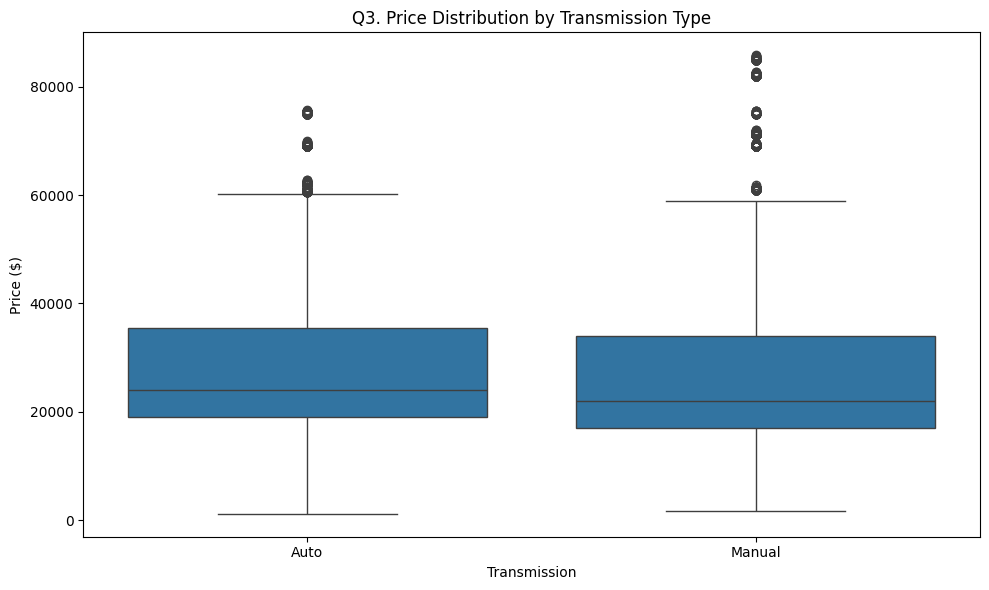

In [ ]:
# Question 3: What is the distribution of car prices for each transmission type, and how do the interquartile ranges
#compare?
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Transmission', y='Price ($)')
plt.title('Q3. Price Distribution by Transmission Type')
plt.tight_layout()
plt.show()

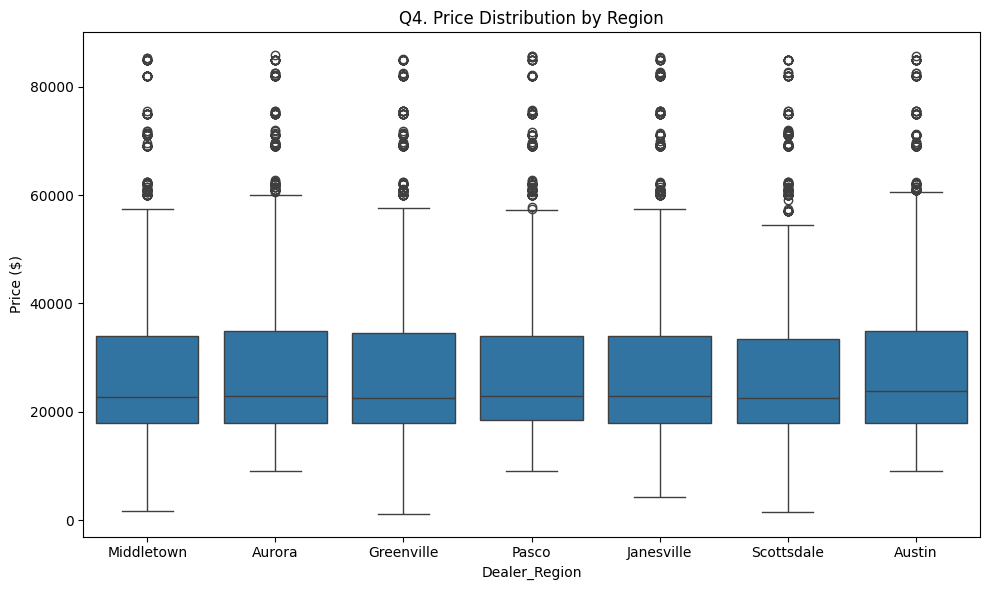

In [ ]:
# Q4. What is the distribution of car prices across different regions
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Dealer_Region', y='Price ($)')
plt.title('Q4. Price Distribution by Region')
plt.tight_layout()
plt.show()


In [ ]:
# Q5. What is the distribution of cars based on body styles
body_style_counts = df['Body Style'].value_counts()
print("Q5. Car distribution by body style:\n", body_style_counts)

Q5. Car distribution by body style:
 Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64


In [ ]:
# Q6. How does the average selling price of cars vary by customer gender and annual income
avg_price_gender_income = df.groupby('Gender')[['Annual Income', 'Price ($)']].mean()
print("Q6. Avg price by gender and income:\n", avg_price_gender_income)

Q6. Avg price by gender and income:
         Annual Income     Price ($)
Gender                             
Female  755973.021339  28277.265270
Male    851184.044207  28039.429407


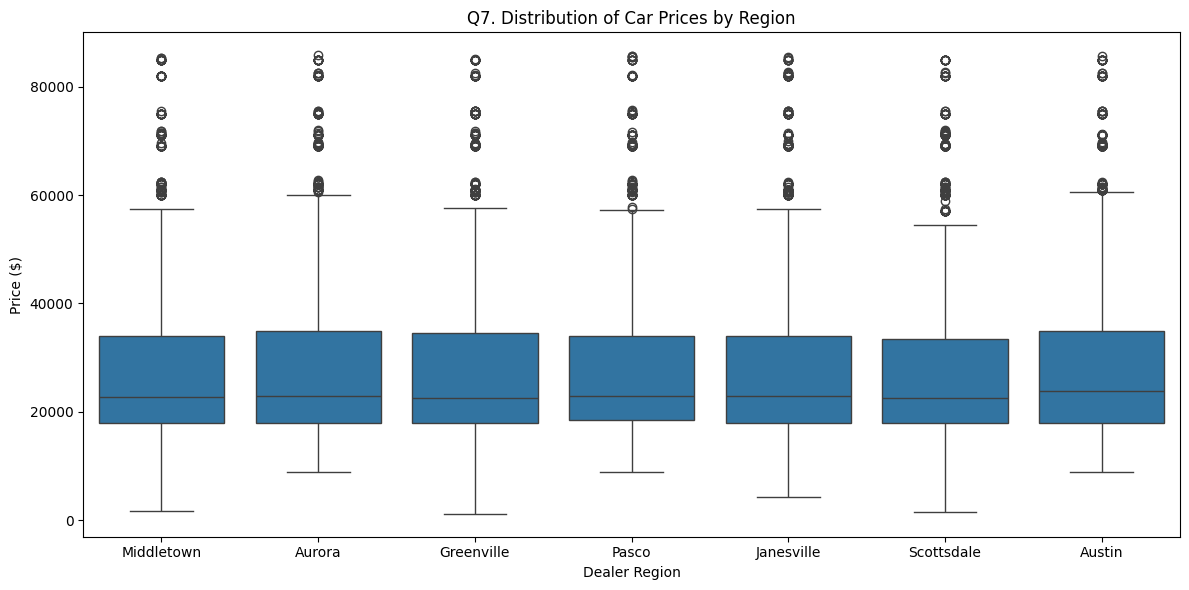

Q7. Number of Cars Sold by Region:
 Dealer_Region
Austin        4135
Janesville    3821
Scottsdale    3433
Pasco         3131
Aurora        3130
Greenville    3128
Middletown    3128
Name: count, dtype: int64


In [ ]:
# Q7. What is the distribution of car prices by region, and how does the number of cars sold vary by region

plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Dealer_Region', y='Price ($)')
plt.title('Q7. Distribution of Car Prices by Region')
plt.xlabel('Dealer Region')
plt.ylabel('Price ($)')
plt.tight_layout()
plt.show()

region_counts = df['Dealer_Region'].value_counts()
print("Q7. Number of Cars Sold by Region:\n", region_counts)


In [ ]:
# Q8. How does the average car price differ between cars with different engine sizes
avg_price_engine = df.groupby('Engine')['Price ($)'].mean()
print("Q8. Avg price by engine type:\n", avg_price_engine)

Q8. Avg price by engine type:
 Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


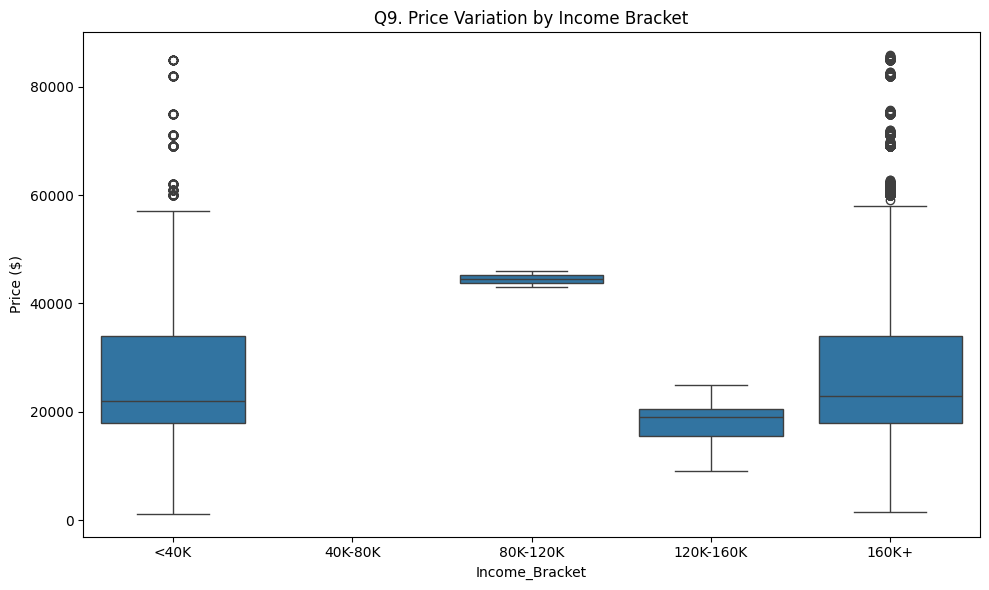

In [ ]:
# Q9. How do car prices vary based on the customer’s annual income bracket
bins = [0, 40000, 80000, 120000, 160000, np.inf]
labels = ['<40K', '40K-80K', '80K-120K', '120K-160K', '160K+']
df['Income_Bracket'] = pd.cut(df['Annual Income'], bins=bins, labels=labels)
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Income_Bracket', y='Price ($)')
plt.title('Q9. Price Variation by Income Bracket')
plt.tight_layout()
plt.show()

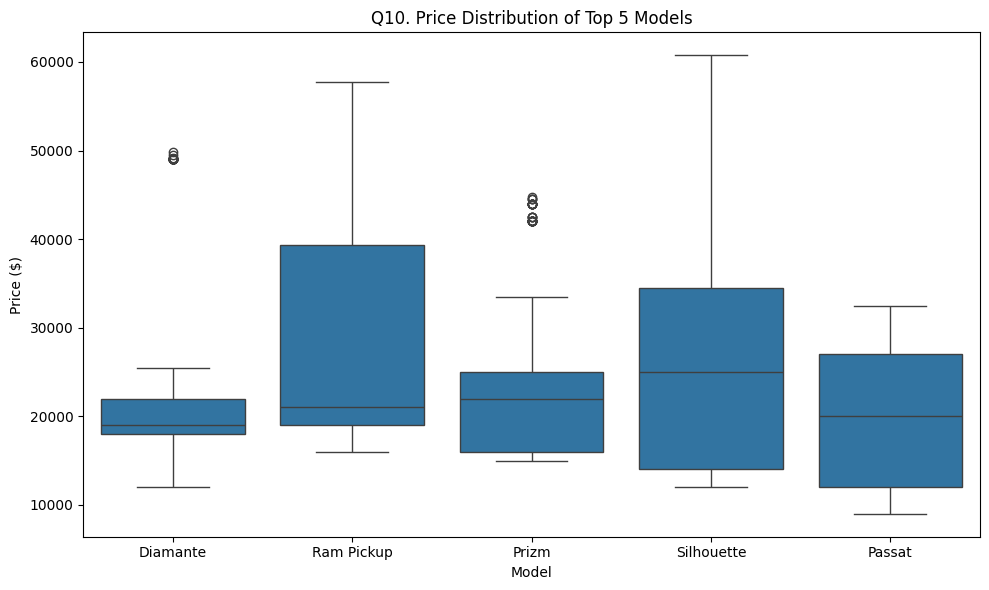

In [ ]:
# Q10. What are the top 5 car models with the highest number of sales, and how does their price distribution look
top_models = df['Model'].value_counts().head(5).index
top_df = df[df['Model'].isin(top_models)]
plt.figure(figsize=(10,6))
sns.boxplot(data=top_df, x='Model', y='Price ($)')
plt.title('Q10. Price Distribution of Top 5 Models')
plt.tight_layout()
plt.show()

Q11. Color with highest price variation:
 Color
Red           15519.360962
Black         15286.065976
Pale White    14077.346859
Name: Price ($), dtype: float64


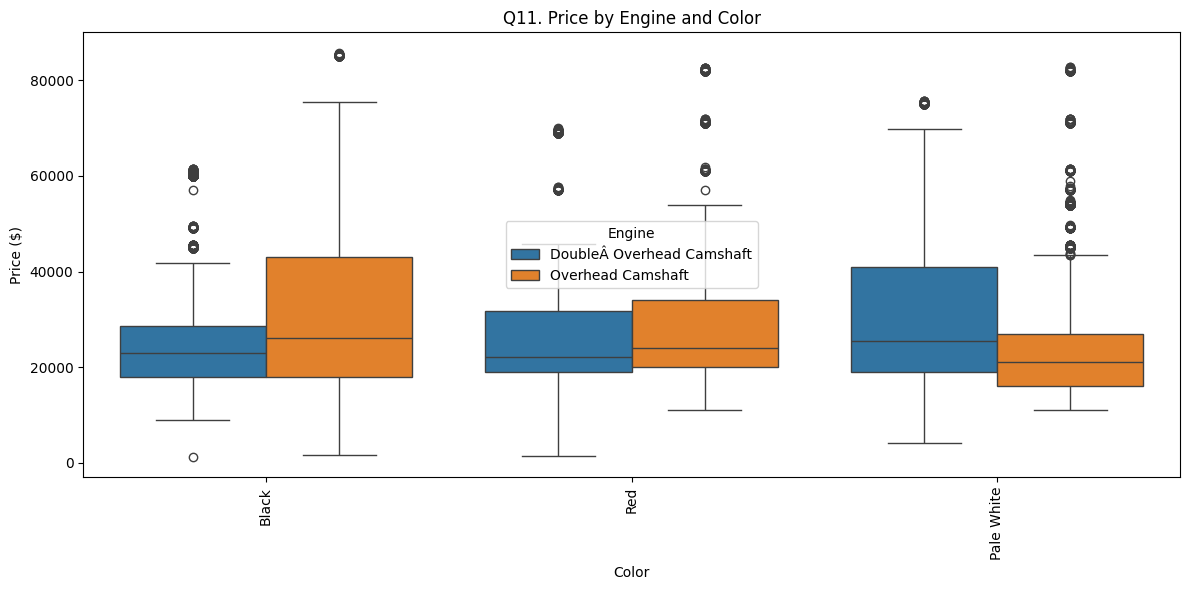

In [ ]:
# Q11. How does car price vary with engine size across different car colors, and which colors have the highest price variation
price_variation_color = df.groupby('Color')['Price ($)'].std().sort_values(ascending=False)
print("Q11. Color with highest price variation:\n", price_variation_color.head())
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Color', y='Price ($)', hue='Engine')
plt.xticks(rotation=90)
plt.title('Q11. Price by Engine and Color')
plt.tight_layout()
plt.show()

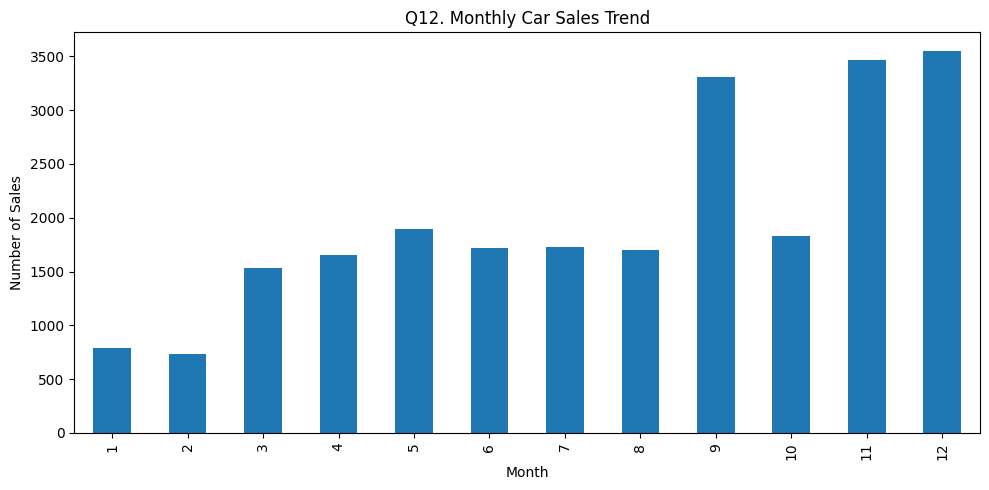

In [ ]:
# Q12. Is there any seasonal trend in car sales based on the date of sale
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
monthly_sales = df['Month'].value_counts().sort_index()
plt.figure(figsize=(10,5))
monthly_sales.plot(kind='bar')
plt.title('Q12. Monthly Car Sales Trend')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.tight_layout()
plt.show()


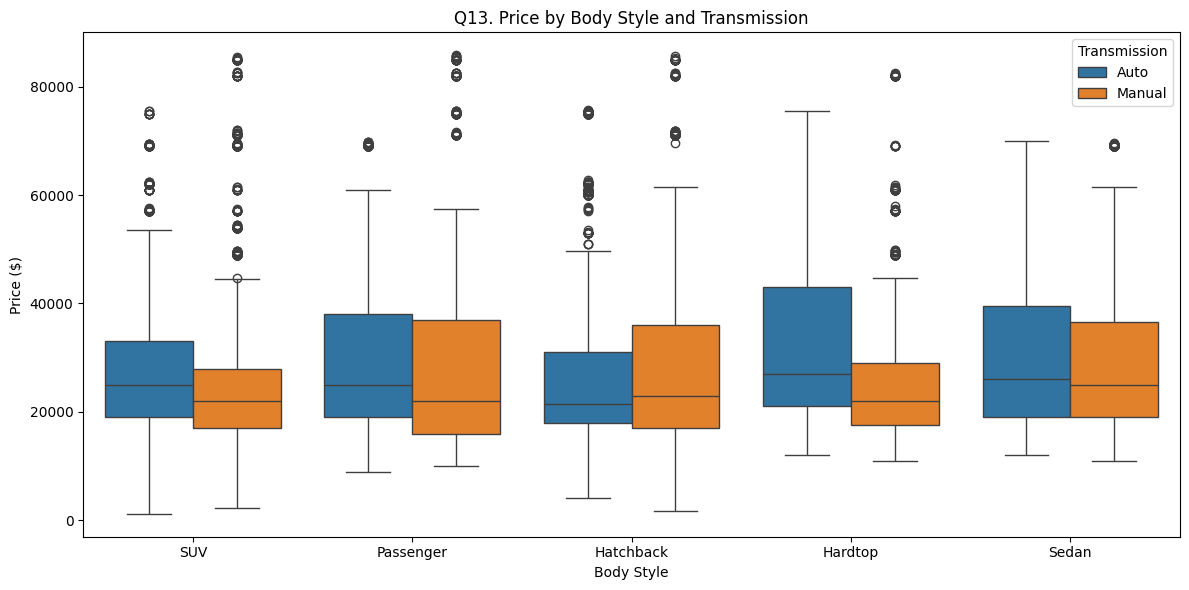

In [ ]:
# Q13. How does the car price distribution change when considering different combinations of body style and transmission type
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Body Style', y='Price ($)', hue='Transmission')
plt.title('Q13. Price by Body Style and Transmission')
plt.tight_layout()
plt.show()


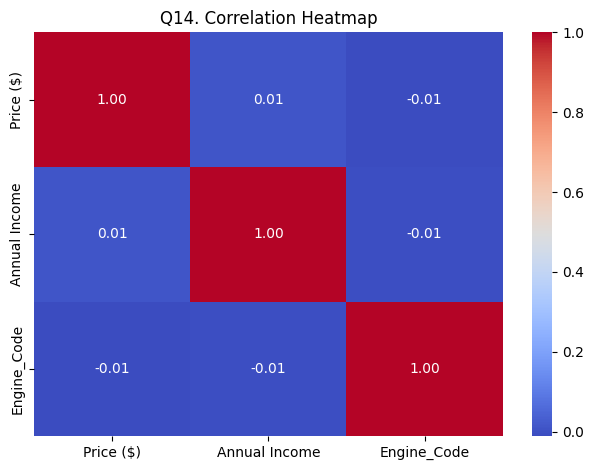

In [ ]:
# Q14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact
engine_mapping = {engine: i for i, engine in enumerate(df['Engine'].unique())}
df['Engine_Code'] = df['Engine'].map(engine_mapping)
correlation_matrix = df[['Price ($)', 'Annual Income', 'Engine_Code']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Q14. Correlation Heatmap')
plt.tight_layout()
plt.show()

In [ ]:
# Q15. How does the average car price vary across different car models and engine types?
avg_price_model_engine = df.groupby(['Model', 'Engine'])['Price ($)'].mean().unstack()
print("Q15. Avg Price by Model and Engine:\n", avg_price_model_engine.head())

Q15. Avg Price by Model and Engine:
 Engine  DoubleÂ Overhead Camshaft  Overhead Camshaft
Model                                               
3-Sep                37986.380117                NaN
3000GT               22764.326923       21770.659864
300M                 21394.888889                NaN
323i                 16744.632287       21038.162162
328i                 21069.149606       38676.177215


#EDA 3

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/amazon.csv')


In [ ]:
# Q1. What is the average rating for each product category

import pandas as pd
import os

# 🔹 Step 1: Upload File in Google Colab (if needed)
from google.colab import files
uploaded = files.upload()

# 🔹 Step 2: Get the correct filename dynamically
file_name = list(uploaded.keys())[0]  # Extract uploaded filename
print(f"Using file: {file_name}")

# 🔹 Step 3: Load the dataset
try:
    df = pd.read_csv(file_name)
    print("\n✅ Dataset loaded successfully!")
except FileNotFoundError:
    print(f"❌ Error: The file '{file_name}' was not found. Please upload the correct file.")

# 🔹 Step 4: Check available columns
print("\nAvailable Columns:", df.columns)

# 🔹 Step 5: Ensure necessary columns exist
if "category" in df.columns and "rating" in df.columns:
    # Convert 'rating' to numeric values, handling missing values
    df["rating"] = pd.to_numeric(df["rating"], errors="coerce")

    # Drop rows with NaN values in 'rating'
    df.dropna(subset=["rating"], inplace=True)

    # Compute average rating for each category
    avg_rating = df.groupby("category")["rating"].mean().reset_index()

    # Display results
    print("\n📊 Average Rating Per Category:")
    print(avg_rating)

else:
    print("❌ Error: Columns 'category' or 'rating' not found in the dataset.")

Saving amazon.csv to amazon (1).csv
Using file: amazon (1).csv

✅ Dataset loaded successfully!

Available Columns: Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

📊 Average Rating Per Category:
                                              category    rating
0    Car&Motorbike|CarAccessories|InteriorAccessori...  3.800000
1    Computers&Accessories|Accessories&Peripherals|...  4.150000
2    Computers&Accessories|Accessories&Peripherals|...  3.500000
3    Computers&Accessories|Accessories&Peripherals|...  3.600000
4    Computers&Accessories|Accessories&Peripherals|...  4.050000
..                                                 ...       ...
206  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.250000
207  OfficeProducts|OfficePaperProducts

In [ ]:
# Q2. What are the top rating_count products by category
top_rated_by_category = df.sort_values('rating_count', ascending=False).groupby('category').head(1)[['product_name', 'rating_count']]
print("\nQ2. Top rating_count products by category:\n", top_rated_by_category)


Q2. Top rating_count products by category:
                                            product_name rating_count
750        Eveready Red 1012 AAA Batteries - Pack of 10          989
977   Sennheiser CX 80S in-Ear Wired Headphones with...       98,250
1059  Pigeon 1.5 litre Hot Kettle and Stainless Stee...          976
32    Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...          974
536   boAt Rockerz 400 Bluetooth On Ear Headphones W...       97,175
...                                                 ...          ...
895   Classmate Octane Colour Burst-Multicolour Gel ...       10,718
941   RC PRINT GI 790 Ink Refill for Canon G1000, G1...        1,367
526   WeCool B1 Mobile Holder for Bikes or Bike Mobi...        1,193
1157  Reffair AX30 [MAX] Portable Air Purifier for C...        1,118
1399  Cafe JEI French Press Coffee and Tea Maker 600...        1,065

[211 rows x 2 columns]


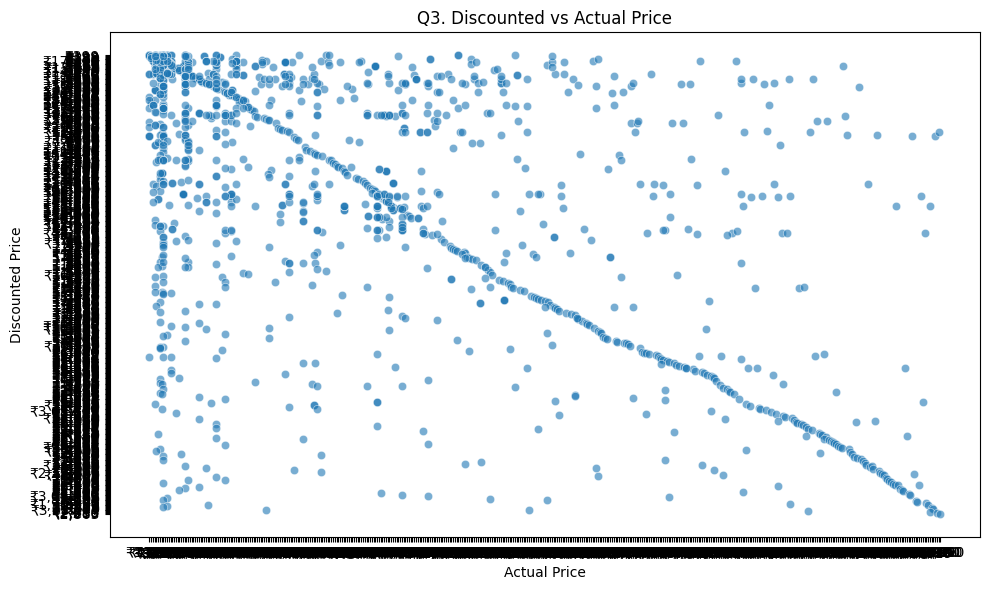

In [ ]:
# Q3. What is the distribution of discounted prices vs. actual prices
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='actual_price', y='discounted_price', alpha=0.6)
plt.title('Q3. Discounted vs Actual Price')
plt.xlabel('Actual Price')
plt.ylabel('Discounted Price')
plt.tight_layout()
plt.show()


Saving amazon.csv to amazon (2).csv
Using file: amazon (2).csv

✅ Dataset loaded successfully!
Available Columns: Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

📊 Average Discount Percentage by Category:
Empty DataFrame
Columns: [category, discount_percentage]
Index: []


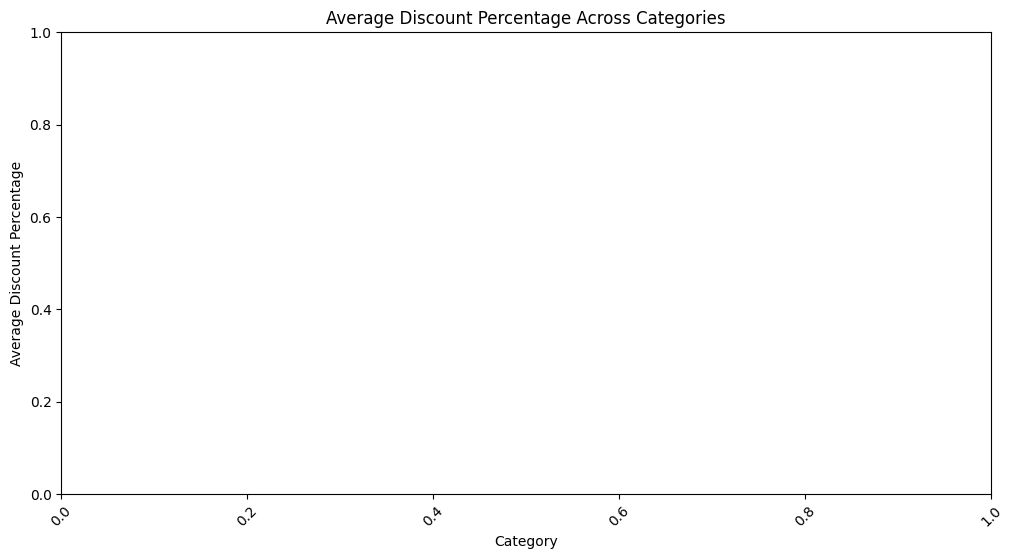

In [ ]:
# Q4. How does the average discount percentage vary across categories
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 Step 1: Upload File in Google Colab
from google.colab import files
uploaded = files.upload()

# 🔹 Step 2: Get the correct filename dynamically
file_name = list(uploaded.keys())[0]  # Extract uploaded filename
print(f"Using file: {file_name}")

# 🔹 Step 3: Load the dataset
df = pd.read_csv(file_name)
print("\n✅ Dataset loaded successfully!")

# 🔹 Step 4: Check available columns
print("Available Columns:", df.columns)

# 🔹 Step 5: Ensure necessary columns exist
if "category" in df.columns and "discount_percentage" in df.columns:
    # Convert discount percentage to numeric values
    df["discount_percentage"] = pd.to_numeric(df["discount_percentage"], errors="coerce")

    # Drop rows with missing values
    df.dropna(subset=["discount_percentage"], inplace=True)

    # 🔹 Step 6: Compute average discount percentage per category
    avg_discount = df.groupby("category")["discount_percentage"].mean().reset_index()

    # Display results
    print("\n📊 Average Discount Percentage by Category:")
    print(avg_discount)

    # 🔹 Step 7: Visualization
    plt.figure(figsize=(12,6))
    sns.barplot(x="category", y="discount_percentage", data=avg_discount, palette="coolwarm")
    plt.xticks(rotation=45)
    plt.xlabel("Category")
    plt.ylabel("Average Discount Percentage")
    plt.title("Average Discount Percentage Across Categories")
    plt.show()

else:
    print("❌ Error: Columns 'category' or 'discount_percentage' not found in the dataset.")

In [ ]:
# Q5. What are the most popular product names
popular_products = df['product_name'].value_counts().head(10)
print("\nQ5. Most popular product names:\n", popular_products)


Q5. Most popular product names:
 Series([], Name: count, dtype: int64)


Saving amazon.csv to amazon (3).csv
Using file: amazon (3).csv

✅ Dataset loaded successfully!
Available Columns: Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

📊 Most Popular Product Keywords:
    Keyword  Frequency
0      with        752
1       for        674
2     black        468
3     cable        401
4       usb        390
5       and        330
6  charging        246
7        to        218
8      fast        211
9         c        188


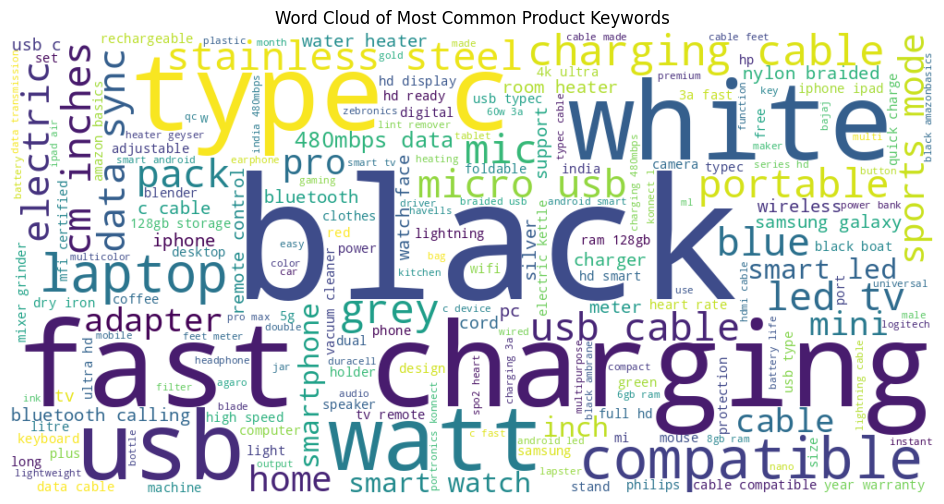

<ipython-input-46-38d28d26431a>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[k[0] for k in top_keywords], y=[k[1] for k in top_keywords], palette="coolwarm")


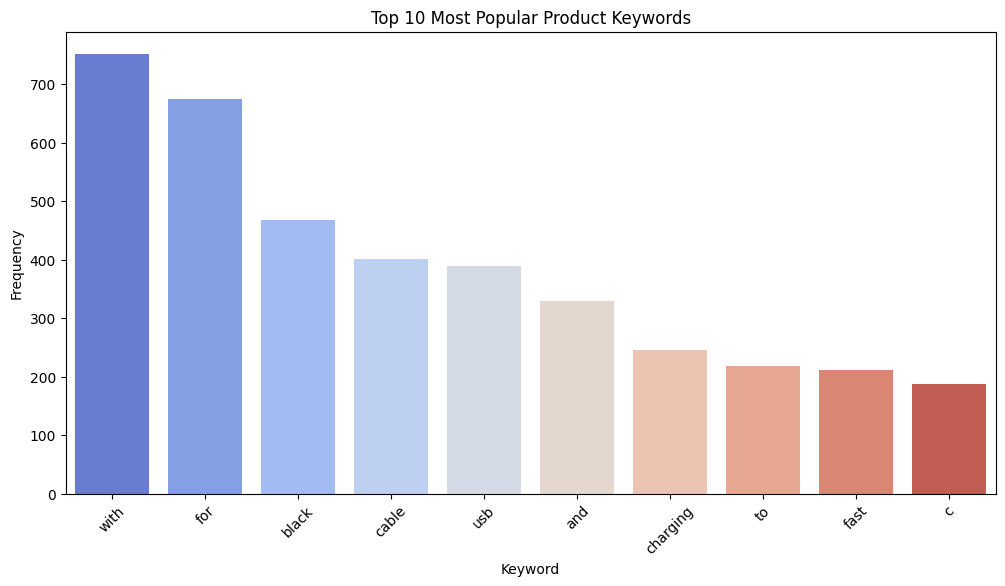

In [ ]:
# Q6. What are the most popular product keywords

import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# 🔹 Step 1: Upload File in Google Colab
from google.colab import files
uploaded = files.upload()

# 🔹 Step 2: Get the correct filename dynamically
file_name = list(uploaded.keys())[0]  # Extract uploaded filename
print(f"Using file: {file_name}")

# 🔹 Step 3: Load the dataset
df = pd.read_csv(file_name)
print("\n✅ Dataset loaded successfully!")

# 🔹 Step 4: Check available columns
print("Available Columns:", df.columns)

# 🔹 Step 5: Ensure 'product_name' or 'about_product' column exists
if "product_name" in df.columns:
    text_column = "product_name"
elif "about_product" in df.columns:
    text_column = "about_product"
else:
    print("❌ Error: No suitable column found for keyword extraction.")
    exit()

# 🔹 Step 6: Process text data to extract keywords
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"[^a-z0-9\s]", "", text)  # Remove special characters
    return text

df[text_column] = df[text_column].apply(clean_text)

# 🔹 Step 7: Count keyword frequencies
all_words = " ".join(df[text_column]).split()
word_freq = Counter(all_words)

# 🔹 Step 8: Display top keywords
top_keywords = word_freq.most_common(10)
print("\n📊 Most Popular Product Keywords:")
print(pd.DataFrame(top_keywords, columns=["Keyword", "Frequency"]))

# 🔹 Step 9: Visualization - Word Cloud
plt.figure(figsize=(12,6))
wordcloud = WordCloud(width=1000, height=500, background_color="white").generate(" ".join(all_words))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Most Common Product Keywords")
plt.show()

# 🔹 Step 10: Visualization - Bar Chart
plt.figure(figsize=(12,6))
sns.barplot(x=[k[0] for k in top_keywords], y=[k[1] for k in top_keywords], palette="coolwarm")
plt.xlabel("Keyword")
plt.ylabel("Frequency")
plt.title("Top 10 Most Popular Product Keywords")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Q7. What are the most popular product reviews
print("\nQ7. What are the most popular product reviews")
popular_reviews = df['review_title'].value_counts().head(10)
print(popular_reviews)



Q7. What are the most popular product reviews
review_title
Worked on iPhone 7 and didn’t work on XR,Good one,Dull Physical Looks,Just Buy it,Go for it,About the product,Get charging cable at the price,Working well.                                                                                                                                     10
Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good                                                                                                                                                                     8
Phone, camera, heating - works for me, may not for all,Good Mobile,Good but not excellent under this budget,Worth the price at 9499,Ok type phone... but unable to make videocall within same service provider.,Phone review,Budget king,Battery backup is good                                  8
A Good Braided Cable for Your Type C Device,Good quality product fr

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


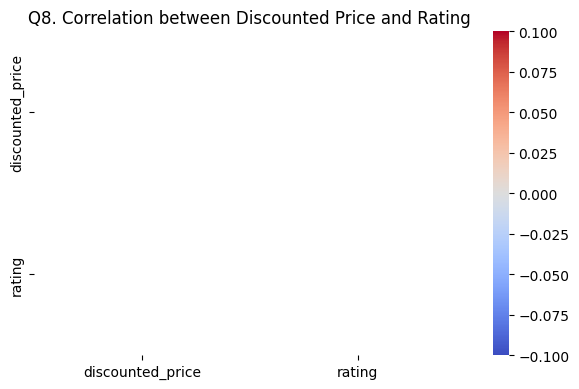


✅ Correlation matrix generated successfully.


In [ ]:
# Q8. What is the correlation between discounted_price and rating
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset again if needed
df = pd.read_csv('/content/amazon.csv')

# Ensure columns are numeric
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Drop missing values for correlation
correlation_df = df[['discounted_price', 'rating']].dropna()

# Calculate and plot the correlation matrix
correlation = correlation_df.corr()
plt.figure(figsize=(6,4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Q8. Correlation between Discounted Price and Rating')
plt.tight_layout()
plt.show()

print("\n✅ Correlation matrix generated successfully.")


In [ ]:
# Q9. What are the Top 5 categories based on the highest ratings
top5_categories_by_rating = df.groupby('category')['rating'].mean().sort_values(ascending=False).head(5)
print("\nQ9. Top 5 categories by rating:\n", top5_categories_by_rating)



Q9. Top 5 categories by rating:
 category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Computers&Accessories|Components|Memory                                     4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
Name: rating, dtype: float64


In [ ]:
# Q10. Identify any potential areas for improvement or optimization based on the data analysis
print("\nQ10. Potential Areas for Improvement:")
print("- Categories with low average ratings may need quality improvement or better curation.")
print("- Products with high actual price but low rating could indicate poor value perception.")
print("- Categories with low discount percentages may benefit from promotional offers.")
print("- Products with very few reviews or ratings may need more visibility or incentivized reviews.")



Q10. Potential Areas for Improvement:
- Categories with low average ratings may need quality improvement or better curation.
- Products with high actual price but low rating could indicate poor value perception.
- Categories with low discount percentages may benefit from promotional offers.
- Products with very few reviews or ratings may need more visibility or incentivized reviews.


#EDA 4

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styles
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Read the dataset
df = pd.read_csv('/content/spotify.csv')

In [2]:
# Question 1:
# Read the dataframe, check null values if present then do the needful, check duplicate rows, if present then do the needful
# -----------------------------
print("\nNull values in each column:")
print(df.isnull().sum())
df.dropna(inplace=True)
print("\nDuplicate rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)



Null values in each column:
Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

Duplicate rows: 27


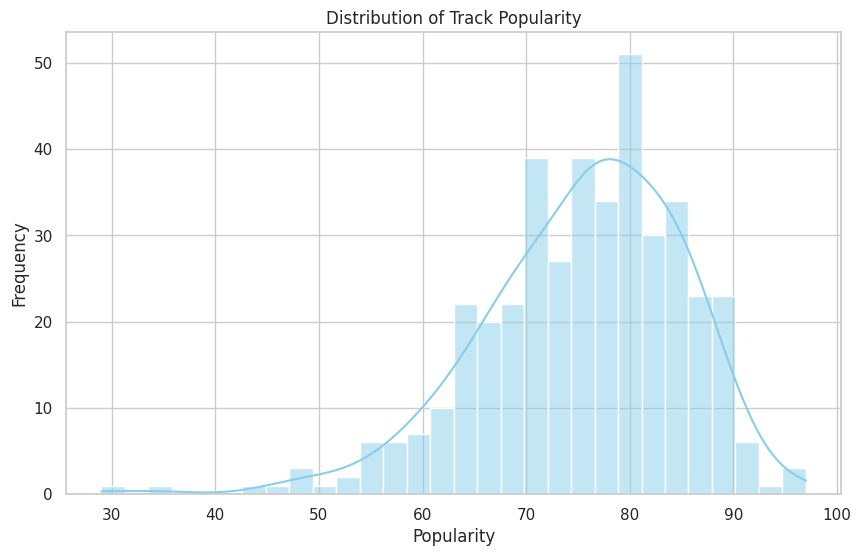

In [3]:
# Question 2:
# What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram
# -----------------------------
plt.figure()
sns.histplot(df['Popularity'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

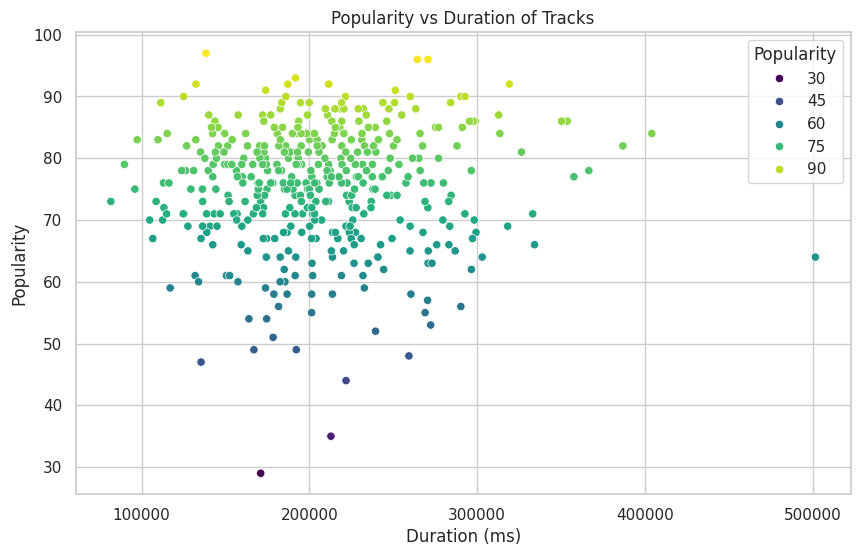

In [4]:
# Question 3:
# Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot
# -----------------------------
plt.figure()
sns.scatterplot(data=df, x='Duration (ms)', y='Popularity', hue='Popularity', palette='viridis')
plt.title('Popularity vs Duration of Tracks')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.show()


<ipython-input-5-d232110017ce>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Artist', data=df, order=artist_counts.index[:10], palette='Set2')


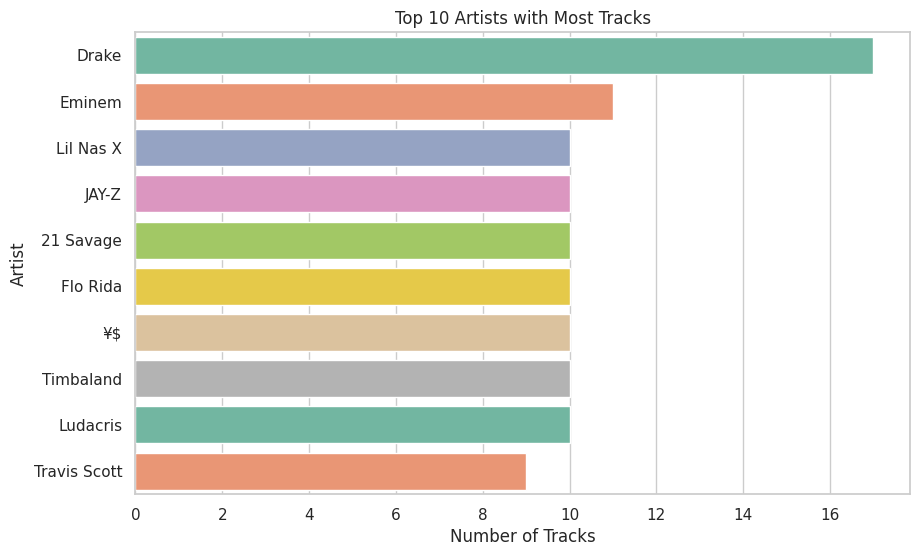

In [5]:
# Question 4:
# Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot
# -----------------------------
plt.figure()
artist_counts = df['Artist'].value_counts()
sns.countplot(y='Artist', data=df, order=artist_counts.index[:10], palette='Set2')
plt.title('Top 10 Artists with Most Tracks')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.show()

In [6]:
# Question 5:
# What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each
# -----------------------------
least_popular = df.sort_values('Popularity').head(5)
print("\nTop 5 Least Popular Tracks:")
print(least_popular[['Artist', 'Track Name', 'Popularity']])



Top 5 Least Popular Tracks:
             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


In [7]:
# Question 6:
# Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist
# -----------------------------
top_artists = df.groupby('Artist')['Popularity'].mean().sort_values(ascending=False).head(5)
print("\nTop 5 Artists by Average Popularity:")
print(top_artists)



Top 5 Artists by Average Popularity:
Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    86.555556
¥$              85.100000
Name: Popularity, dtype: float64


In [8]:
# Question 7:
# For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist
# -----------------------------
print("\nMost Popular Tracks of Top 5 Artists:")
for artist in top_artists.index:
    top_track = df[df['Artist'] == artist].sort_values('Popularity', ascending=False).iloc[0]
    print(f"{artist}: {top_track['Track Name']} (Popularity: {top_track['Popularity']})")



Most Popular Tracks of Top 5 Artists:
cassö: Prada (Popularity: 92)
Trueno: Mamichula - con Nicki Nicole (Popularity: 89)
David Guetta: Baby Don't Hurt Me (Popularity: 87)
Travis Scott: FE!N (feat. Playboi Carti) (Popularity: 93)
¥$: CARNIVAL (Popularity: 96)


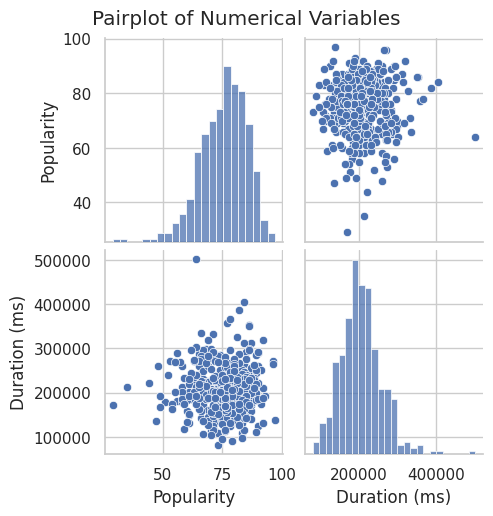

In [9]:
# Question 8:
# Visualize relationships between multiple numerical variables simultaneously using a pair plot
# -----------------------------
sns.pairplot(df[['Popularity', 'Duration (ms)']])
plt.suptitle("Pairplot of Numerical Variables", y=1.02)
plt.show()

<ipython-input-11-7e9efc1fc2a1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['Artist'].isin(top_artists_list)], x='Artist', y='Duration (ms)', palette='coolwarm')


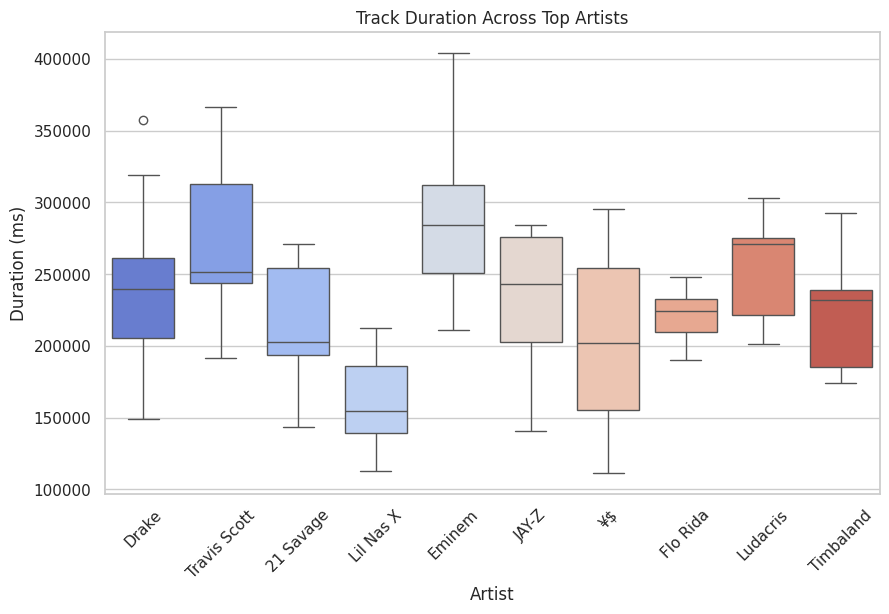

In [11]:
 #Question 9:
# Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot
# -----------------------------
top_artists_list = artist_counts.index[:10]
plt.figure()
sns.boxplot(data=df[df['Artist'].isin(top_artists_list)], x='Artist', y='Duration (ms)', palette='coolwarm')
plt.title('Track Duration Across Top Artists')
plt.xticks(rotation=45)
plt.show()

<ipython-input-12-639a12a1169f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df[df['Artist'].isin(top_artists_list)], x='Artist', y='Popularity', palette='Accent')


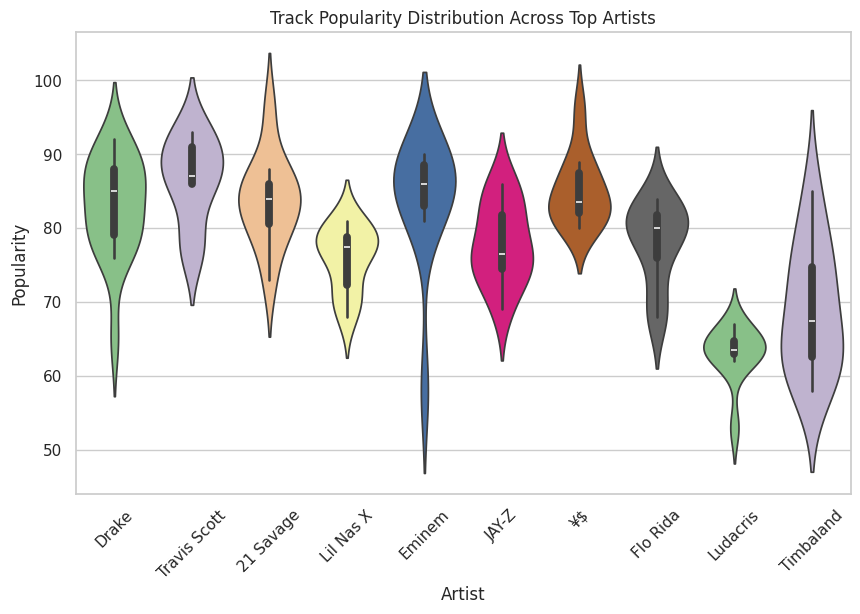

In [12]:
# Question 10:
# How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot
# -----------------------------
plt.figure()
sns.violinplot(data=df[df['Artist'].isin(top_artists_list)], x='Artist', y='Popularity', palette='Accent')
plt.title('Track Popularity Distribution Across Top Artists')
plt.xticks(rotation=45)
plt.show()